# Project 21: Image Compression with Deep Autoencoders

In [1]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
dataset_train = datasets.MNIST('Datasets', train=True, download=True, transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

In [3]:
dataset_test = datasets.MNIST('Datasets', train=False, download=True, transform=transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=256, shuffle=True)

In [4]:
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder0 = nn.Linear(in_features = 784, out_features = 128)
        self.encoder1 = nn.Linear(128, 64)
        self.encoder2 = nn.Linear(64, 32)

        self.decoder0 = nn.Linear(32, 64)
        self.decoder1 = nn.Linear(64, 128)
        self.decoder2 = nn.Linear(128, 784)

        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation1(self.encoder0(x))
        x = self.activation1(self.encoder1(x))
        x = self.activation1(self.encoder2(x))

        x = self.activation1(self.decoder0(x))
        x = self.activation1(self.decoder1(x))
        x = self.activation2(self.decoder2(x))

        return x

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = autoencoder().to(device)

In [6]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [7]:
for epoch in range(20):
    running_loss_train = 0

    for data in loader_train:
        model.train()

        inputs, _ = data 
        inputs = inputs.to(device).view(-1, 784)
        
        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, inputs.view(*outputs.shape))
        loss.backward()

        optimizer.step()

        running_loss_train += loss.item()

    running_loss_val = 0
    for data in loader_test:
        model.eval()

        inputs, _ = data 
        inputs = inputs.to(device).view(-1, 784)

        outputs = model(inputs)

        loss = criterion(outputs, inputs.view(*outputs.shape))

        running_loss_val += loss.item()

    print(f'Epoch {epoch+1}/{20} - Loss Train: {running_loss_train/len(loader_train)} - Loss Val: {running_loss_val/len(loader_test)}')

Epoch 1/20 - Loss Train: 0.2905770649301245 - Loss Val: 0.23495350144803523
Epoch 2/20 - Loss Train: 0.20879773320035733 - Loss Val: 0.17828638330101967
Epoch 3/20 - Loss Train: 0.16542483853532913 - Loss Val: 0.1526575516909361
Epoch 4/20 - Loss Train: 0.14799065754768695 - Loss Val: 0.1411201421171427
Epoch 5/20 - Loss Train: 0.13899269744436793 - Loss Val: 0.13484306149184705
Epoch 6/20 - Loss Train: 0.13339000591572295 - Loss Val: 0.1294188141822815
Epoch 7/20 - Loss Train: 0.12839980290291156 - Loss Val: 0.12535896394401788
Epoch 8/20 - Loss Train: 0.12497879158943258 - Loss Val: 0.12242200393229723
Epoch 9/20 - Loss Train: 0.12224230823364664 - Loss Val: 0.11972525380551816
Epoch 10/20 - Loss Train: 0.11977871742020262 - Loss Val: 0.11713901236653328
Epoch 11/20 - Loss Train: 0.11759900973832353 - Loss Val: 0.11462270990014076
Epoch 12/20 - Loss Train: 0.11552326454127089 - Loss Val: 0.1137296712026
Epoch 13/20 - Loss Train: 0.11370370229508014 - Loss Val: 0.11112755965441465
Epo

In [8]:
class encoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder0 = list(model.children())[0]
        self.encoder1 = list(model.children())[1]
        self.encoder2 = list(model.children())[2]

        self.activation1 = list(model.children())[6]

    def forward(self, x):
        x = self.activation1(self.encoder0(x))
        x = self.activation1(self.encoder1(x))
        x = self.activation1(self.encoder2(x))

        return x

In [9]:
model1 = encoder().to(device)

In [10]:
class decoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.decoder0 = list(model.children())[3]
        self.decoder1 = list(model.children())[4]
        self.decoder2 = list(model.children())[5]

        self.activation1 = list(model.children())[6]
        self.activation2 = list(model.children())[7]

    def forward(self, x):
        x = self.activation1(self.decoder0(x))
        x = self.activation1(self.decoder1(x))
        x = self.activation2(self.decoder2(x))

        return x

In [11]:
model2 = decoder().to(device)

In [12]:
sample_size = 10

test_image = next(iter(loader_test))[0][:sample_size]
test_image = test_image.to(device).view(-1, 784)

In [13]:
model1.eval()

codify_image = model1(test_image)

In [14]:
model2.eval()

decoded_image = model2(codify_image)

In [15]:
test_image = test_image.detach().cpu().numpy().reshape(-1, 28, 28)
codify_image = codify_image.detach().cpu().numpy().reshape(-1, 8, 4)
decoded_image = decoded_image.detach().cpu().numpy().reshape(-1, 28, 28)

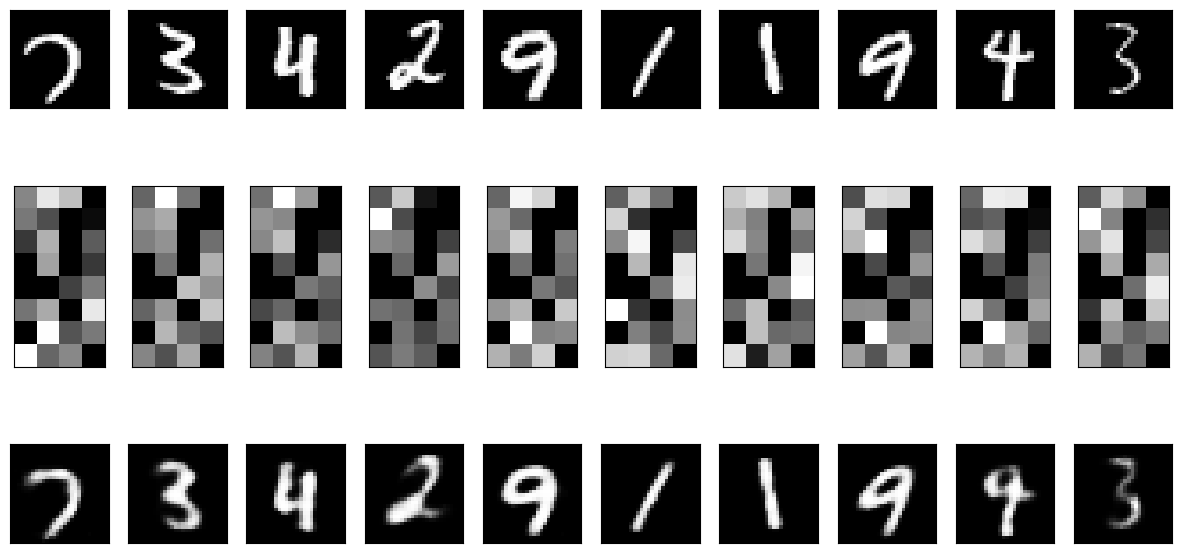

In [17]:
fig, axes = plt.subplots(3, sample_size, figsize=(15,8))

for images, ax_row in zip([test_image, codify_image, decoded_image], axes):
    for img, ax in zip(images, ax_row):
        ax.imshow(img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)